In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
df= pd.read_csv('C:/Users/ahana/Downloads/insurance.csv')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
df.shape     #dataset contains 1338 datapoints with 6 independent features and 1 dependent/target feature

(1338, 7)

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.info()           #dataset contains 2columns with float values,2columns with integer values and 3 columns with categorical values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe()           #descriptive analysis of the dataset

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.isnull().sum()     #no null values in the dataset

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

C:\Users\ahana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

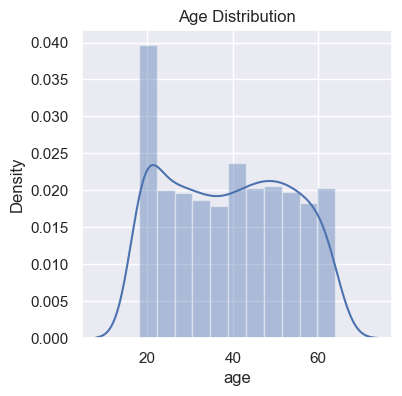

In [10]:
#distribution of age values
sns.set()
plt.figure(figsize=(4,4))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show

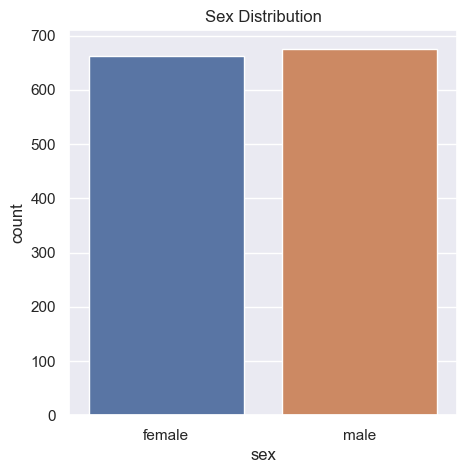

In [11]:
#for sex column
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data= df)
plt.title('Sex Distribution')
plt.show()

In [12]:
df['sex'].value_counts()    #gives the count of number of males and females

male      676
female    662
Name: sex, dtype: int64

C:\Users\ahana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


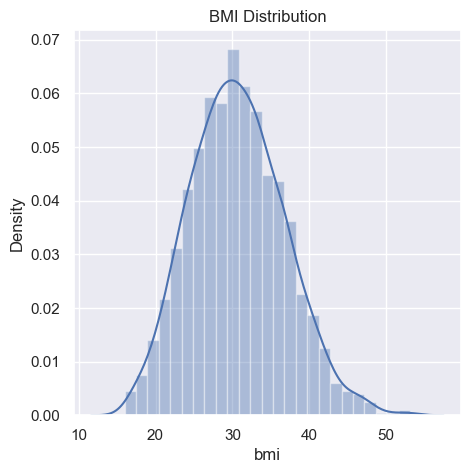

In [13]:
#for BMI column
plt.figure(figsize=(5,5))
sns.distplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

Normal BMI range = 18.5 to 24.9.
Hence, a lot of people in our data are overweight

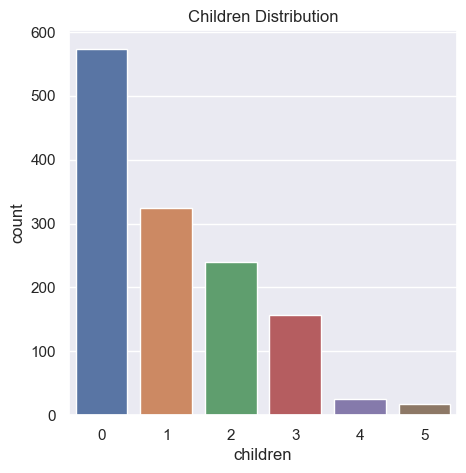

In [14]:
#Children column
plt.figure(figsize=(5,5))
sns.countplot(x='children', data=df)
plt.title('Children Distribution')
plt.show()                                 #using countplots since the children column takes only very few values

In [15]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

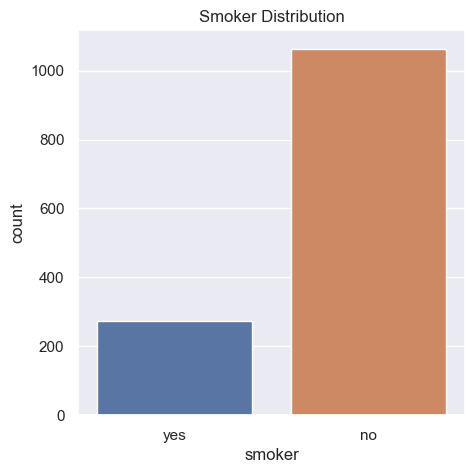

In [16]:
#smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data= df)
plt.title('Smoker Distribution')
plt.show()     

In [17]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

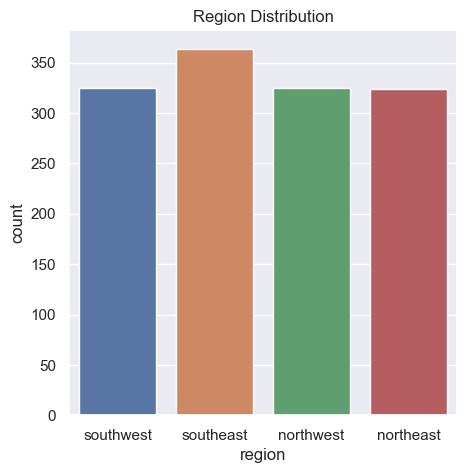

In [18]:
#region column
plt.figure(figsize=(5,5))
sns.countplot(x='region',data= df)
plt.title('Region Distribution')
plt.show()     

In [19]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\ahana\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

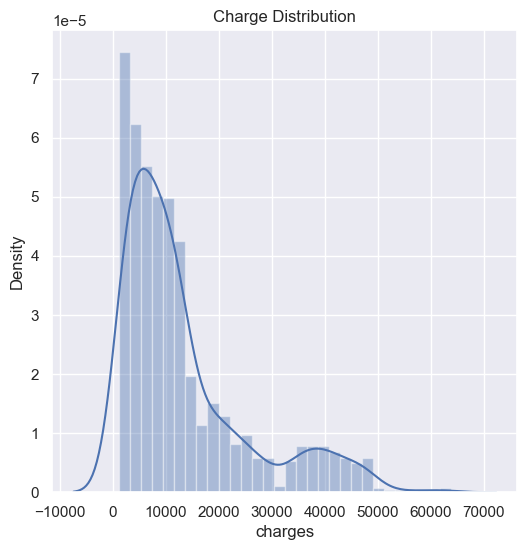

In [20]:
#distribution of charges values
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

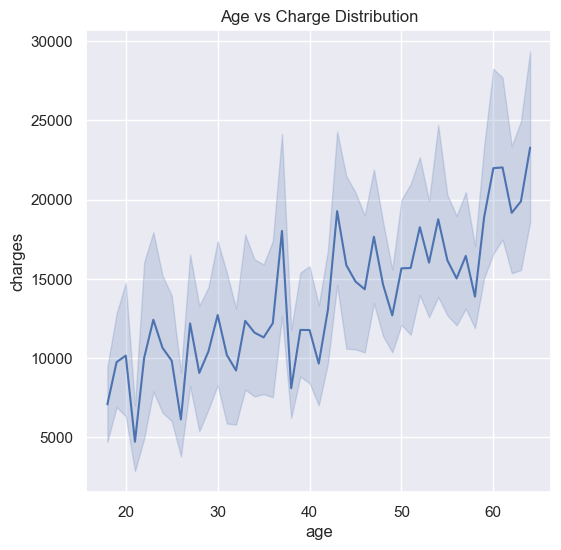

In [21]:
#Scatterplot for Age and Charges and for BMI and Charges
plt.figure(figsize=(6,6))
sns.lineplot(x='age',y='charges',data= df)
plt.title('Age vs Charge Distribution')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

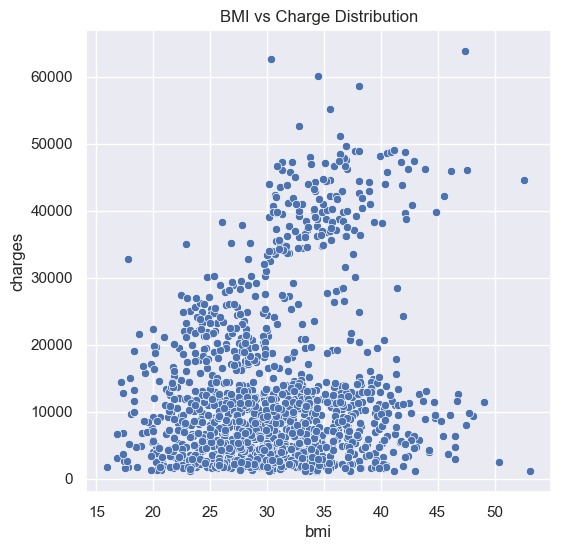

In [22]:
#Scatterplot for BMI and Charges
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi',y='charges',data= df)
plt.title('BMI vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

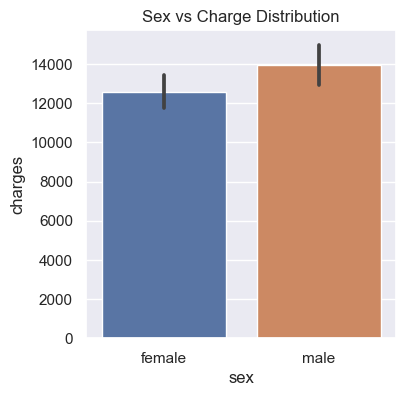

In [23]:
#Scatterplot for Sex and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='sex',y='charges',data= df)
plt.title('Sex vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

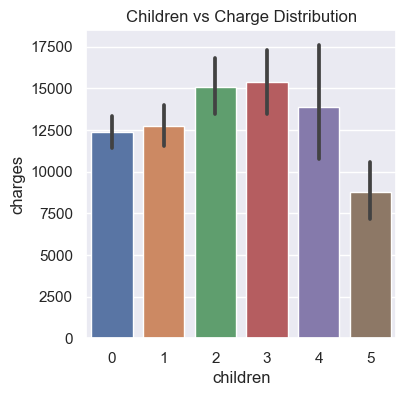

In [24]:
#Scatterplot for Children and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='children',y='charges',data= df)
plt.title('Children vs Charge Distribution')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

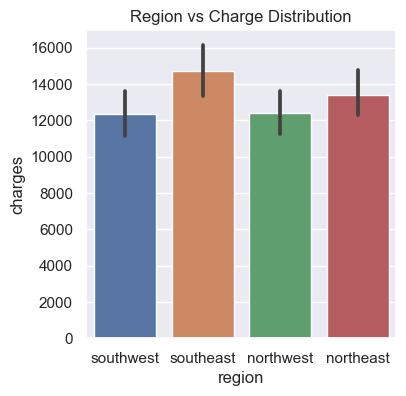

In [25]:
#Scatterplot for Region and Charges
plt.figure(figsize=(4,4))
sns.barplot(x='region',y='charges',data= df)
plt.title('Region vs Charge Distribution')
plt.show

Encoding the categorical features i.e., sex, smoker, region

In [28]:
#encoding sex column
df.replace({'sex':{'male':0, 'female':1}},inplace= True)
#encoding smoker column
df.replace({'smoker':{'yes':0, 'no':1}},inplace= True)
#encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace= True)

In [29]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


Splitting the features and the target

In [106]:
X= df.drop(columns= 'charges',axis= 1)
y= df['charges']

In [107]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [108]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [109]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size =0.8,test_size=0.2, random_state=2)

In [110]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [114]:
#loading the linear regression model
lr = LinearRegression()          #model training
svm= SVR()
rf= RandomForestRegressor()

In [115]:
lr.fit(X_train, y_train)
svm.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestRegressor()

MODEL EVALUATION

In [116]:
#prediction on training data
training_data_pred1= lr.predict(X_train)
training_data_pred2= svm.predict(X_train)
training_data_pred3= rf.predict(X_train)

In [120]:
#R squared value
r2_train1= metrics.r2_score(y_train,training_data_pred1)
r2_train2= metrics.r2_score(y_train,training_data_pred2)
r2_train3= metrics.r2_score(y_train,training_data_pred3)
print('The R squared value for the training dataset under linear regression is: ',r2_train1)
print('The R squared value for the training dataset under support vector machine is: ',r2_train2)
print('The R squared value for the training dataset under random forest regressor is: ',r2_train3)


The R squared value for the training dataset under linear regression is:  0.751505643411174
The R squared value for the training dataset under support vector machine is:  -0.11104302786402909
The R squared value for the training dataset under random forest regressor is:  0.9776824131033612


In [118]:
#prediction on test data
test_data_pred1= lr.predict(X_test)
test_data_pred2= svm.predict(X_test)
test_data_pred3= rf.predict(X_test)

In [119]:
#R squared value
r2_test1= metrics.r2_score(y_test,test_data_pred1)
print('The R squared value for the testing dataset is: ',r2_test1)
r2_test2= metrics.r2_score(y_test,test_data_pred2)
print('The R squared value for the testing dataset is: ',r2_test2)
r2_test3= metrics.r2_score(y_test,test_data_pred3)
print('The R squared value for the testing dataset is: ',r2_test3)

The R squared value for the testing dataset is:  0.7447273869684077
The R squared value for the testing dataset is:  -0.08038132828590361
The R squared value for the testing dataset is:  0.8381416253492544


BUILDING A PREDICTIVE SYSTEM

In [124]:
input_data= (31,1,25.74,0,1,0)
#changing input_data to numpy array
input_data_as_numpy_array= np.asarray(input_data)
#reshaping the array
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)       #reshape(1,-1) since we are predicting on the basis of a single sample or row
prediction1= lr.predict(input_data_reshaped)
print('The insurance cost is USD ',prediction1[0])
prediction2= svm.predict(input_data_reshaped)
print('The insurance cost is USD ',prediction2[0])
prediction3= rf.predict(input_data_reshaped)
print('The insurance cost is USD ',prediction3[0])

The insurance cost is USD  3760.0805764960496
The insurance cost is USD  9229.067925432624
The insurance cost is USD  3762.7690565000044


C:\Users\ahana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ahana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
C:\Users\ahana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
